<Body>   
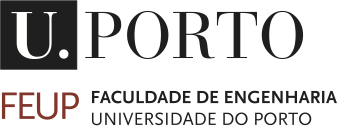   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

# **Identification**

* **Group:** 01
* **Name:** Bernardo de Almeida Soeiro
* **Student Number:** up202008204

* **Name:** José Pedro Machado Leite Arteaga
* **Student Number:** up202004450

* **Name:** Rodrigo de Vasconcelos e Miguel
* **Student Number:** up202008406

---




# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>   
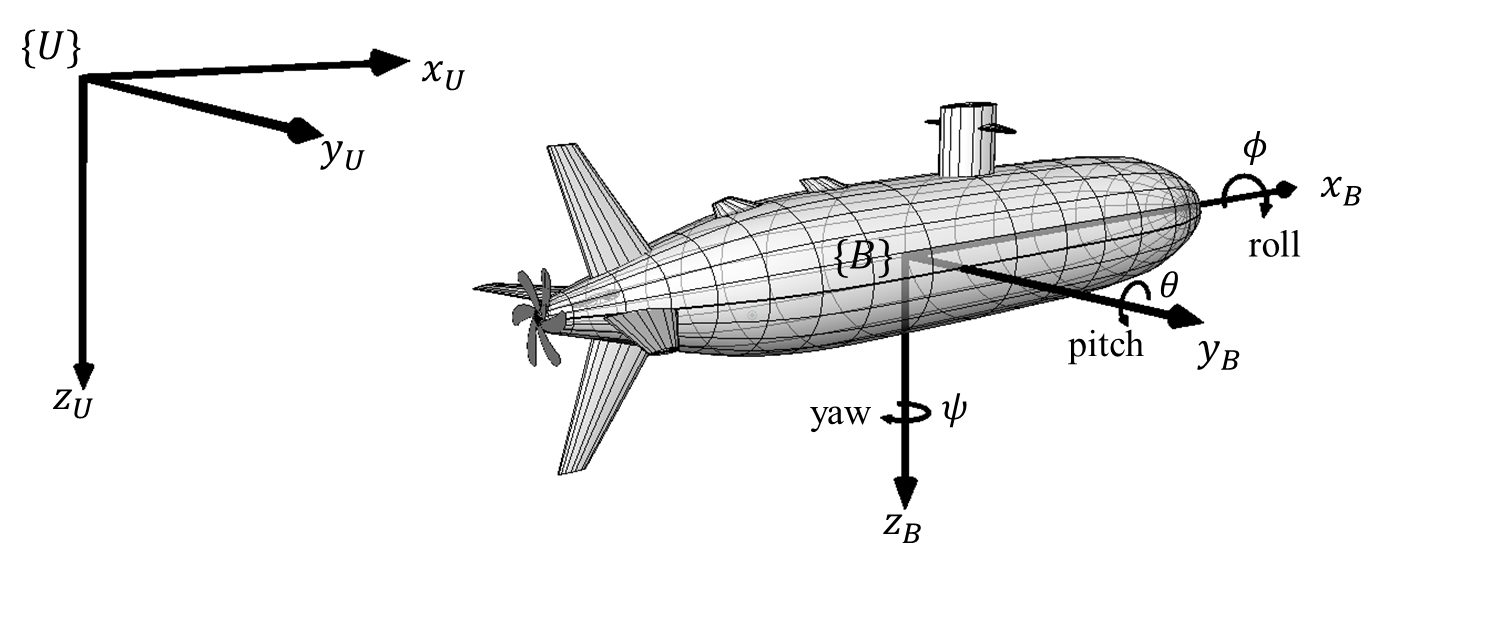

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.






In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

In [ ]:
import numpy as np

A = np.array([[0, 1, -1],
              [0, -3, 0],
              [0, 0, 0] ])

print ('A matrix\n', A)

#Let's check the eigenvalues of A
eig_open_loop, eig_vect = np.linalg.eig( A )
print ('Eigenvalues of A \n', eig_open_loop)

A matrix
 [[ 0  1 -1]
 [ 0 -3  0]
 [ 0  0  0]]
Eigenvalues of A 
 [ 0. -3.  0.]



**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

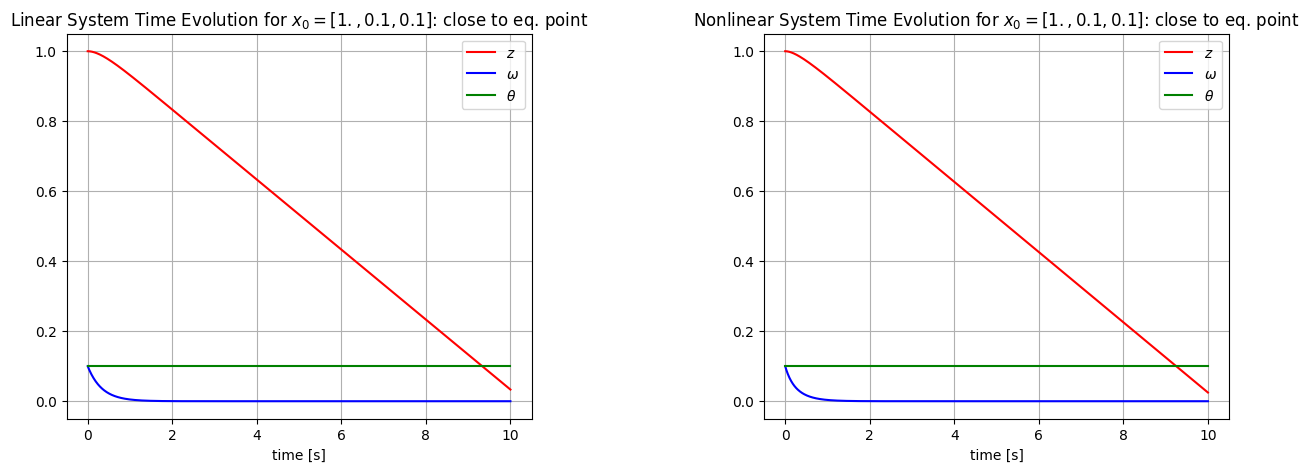

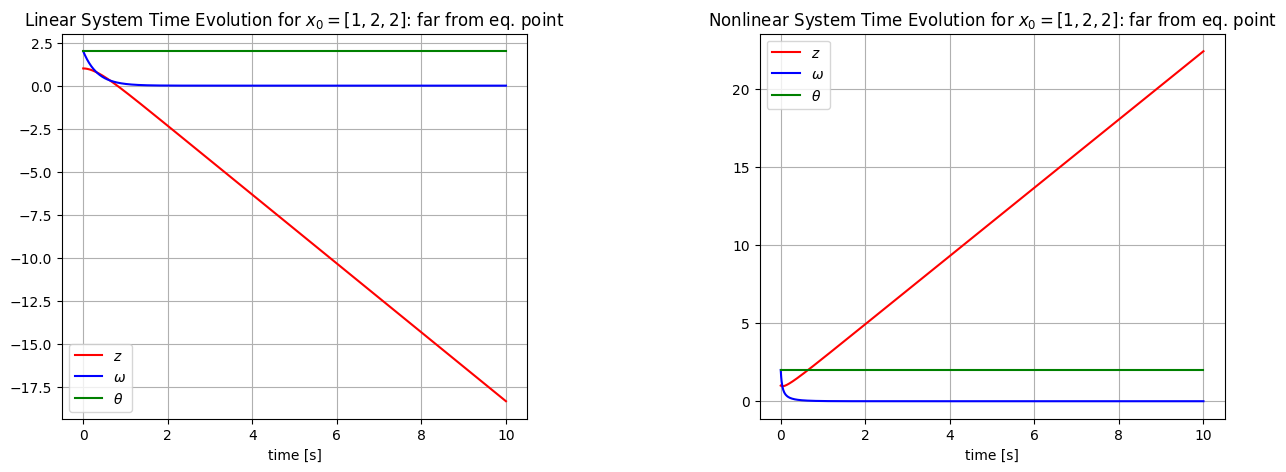

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#parameters
vd = 1
d1 = -3
d2 = -12
m_ = 0.9
q = 0

A = np.array([[0, 1, -1],
              [0, -3, 0],
              [0, 0, 0] ])

# vector field
def Sys_linear_f(x, t=0):
  return A @ x

def Sys_nonlin_f(x, t=0):
    return np.array([
        -vd*np.tan(x[2]) + (1/np.cos(x[2]))*x[1],
        d1*x[1] + d2*x[1]*np.abs(x[1]) + m_*(vd/np.cos(x[2]) - x[1]*np.tan(x[2]))*q,
        q
    ])

# generate 1000 linearly spaced points for t
t_end=10
t = np.linspace(0, t_end,  1000)

# initial values, close to the equilibrium point:
x0_close = np.array([1, 0.1, 0.1])
#initial values, far from the equilibrium point:
x0_far = np.array([1, 2, 2])

x_l_close, infodict = integrate.odeint(Sys_linear_f, x0_close, t, full_output=True)
x_nl_close, infodict = integrate.odeint(Sys_nonlin_f, x0_close, t, full_output=True)
x_l_far, infodict = integrate.odeint(Sys_linear_f, x0_far, t, full_output=True)
x_nl_far, infodict = integrate.odeint(Sys_nonlin_f, x0_far, t, full_output=True)
# infodict['message']                      # integration successful

x_l_1_close,x_l_2_close, x_l_3_close = x_l_close.T
x_nl_1_close,x_nl_2_close, x_nl_3_close = x_nl_close.T

x_l_1_far,x_l_2_far, x_l_3_far = x_l_far.T
x_nl_1_far,x_nl_2_far, x_nl_3_far = x_nl_far.T

#plots for x0=x0_close
fig_close = plt.figure(figsize=(15,5))
fig_close.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig_close.add_subplot(1,2,1)
ax2 = fig_close.add_subplot(1,2,2)

ax1.plot(t, x_l_1_close, 'r-', label='$z$')
ax1.plot(t, x_l_2_close, 'b-', label='$\omega$')
ax1.plot(t, x_l_3_close, 'g-', label='$\\theta$')
ax1.set_title("Linear System Time Evolution for $x_0 = " + np.array2string(x0_close, separator=',') + "$: close to eq. point")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t, x_nl_1_close, 'r-', label='$z$')
ax2.plot(t, x_nl_2_close, 'b-', label='$\omega$')
ax2.plot(t, x_nl_3_close, 'g-', label='$\\theta$')
ax2.set_title("Nonlinear System Time Evolution for $x_0 = " + np.array2string(x0_close, separator=',') + "$: close to eq. point")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best');

#plots for x0=x0_close
fig_far = plt.figure(figsize=(15,5))
fig_far.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig_far.add_subplot(1,2,1)
ax2 = fig_far.add_subplot(1,2,2)

ax1.plot(t, x_l_1_far, 'r-', label='$z$')
ax1.plot(t, x_l_2_far, 'b-', label='$\omega$')
ax1.plot(t, x_l_3_far, 'g-', label='$\\theta$')
ax1.set_title("Linear System Time Evolution for $x_0 = " + np.array2string(x0_far, separator=',') + "$: far from eq. point")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t, x_nl_1_far, 'r-', label='$z$')
ax2.plot(t, x_nl_2_far, 'b-', label='$\omega$')
ax2.plot(t, x_nl_3_far, 'g-', label='$\\theta$')
ax2.set_title("Nonlinear System Time Evolution for $x_0 = " + np.array2string(x0_far, separator=',') + "$: far from eq. point")
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best');



**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

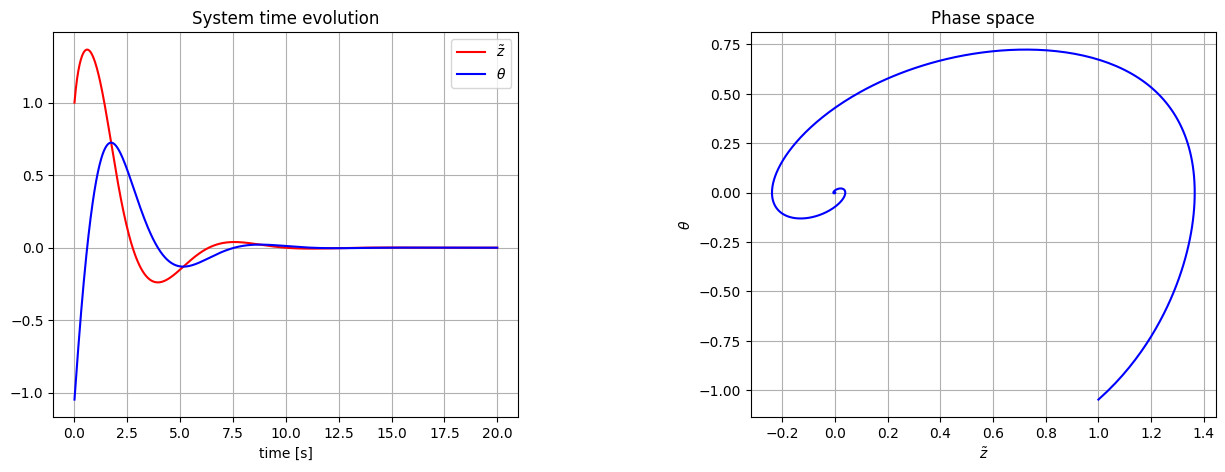

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
vd = 1
k1 = 1
k2 = 1

# vector field
def Sys_f(x, t=0):
    return np.array([
        -vd*np.tan(x[1]),
        k1*x[0]-k2*x[1]
    ])

# generate 1000 linearly spaced points for t
t_end=20
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, -1/3*np.pi])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                      # integration successful

x1,x2 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, x1, 'r-', label='$\\tilde z$')
ax1.plot(t, x2, 'b-', label='$\\theta$')
ax1.set_title("System time evolution")
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1, x2, color="blue")
ax2.set_xlabel("$\\tilde z$")
ax2.set_ylabel("$\\theta$")
ax2.set_title("Phase space")
ax2.grid()

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

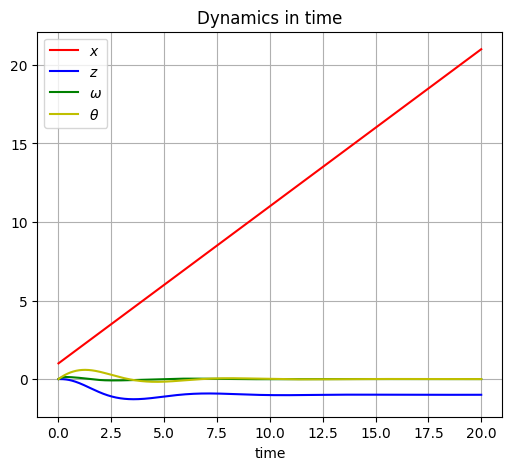

In [ ]:
# To complete

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
vd = 1
k1 = 1
k2 = 1
d1 = -3
d2 = -12
m_ = 0.9

# vector field
def Sys_f(x, t=0):
  q= k1+x[1]-k2*x[3]
  return np.array([vd,
                  -vd*np.tan(x[3]) + (1 / np.cos(x[3])) * x[2],
                  d1 * x[2] + d2 * x[2] * np.abs(x[2]) + m_*(1/np.cos(x[3])-x[2]*np.tan(x[3]))* q,
                  q
                  ])

# generate 1000 linearly spaced points for t
t_end=20
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1, 0, 0, 0])
#x0 = np.array([3.13, 0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                      # integration successful

x1,x2, x3, x4 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)

ax1.plot(t, x1, 'r-', label='$x$')
ax1.plot(t, x2, 'b-', label='$z$')
ax1.plot(t, x3, 'g-', label='$\\omega$')
ax1.plot(t, x4, 'y-', label='$\\theta$')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best');

